In [36]:
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#EDA

In [18]:
os.getcwd()
df=pd.read_csv('Employee Salary.csv',sep=',',header=0, encoding="latin")

In [19]:
df.head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
Emp ID                    1000 non-null int64
Name Prefix               1000 non-null object
First Name                1000 non-null object
Middle Initial            1000 non-null object
Last Name                 1000 non-null object
Gender                    1000 non-null object
E Mail                    1000 non-null object
Father's Name             1000 non-null object
Mother's Name             1000 non-null object
Mother's Maiden Name      1000 non-null object
Date of Birth             1000 non-null object
Time of Birth             1000 non-null object
Age in Yrs.               1000 non-null float64
Weight in Kgs.            1000 non-null int64
Date of Joining           1000 non-null object
Quarter of Joining        1000 non-null object
Half of Joining           1000 non-null object
Year of Joining           1000 non-null int64
Month of Joining          1000 non-null int64
Mont

In [21]:
df.describe()

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549097.583000,40.377250,59.409000,2006.992000,6.415000,16.481000,10.093720,120288.528000,48698.499000
std,264810.879315,11.107729,13.900322,8.565588,3.428488,8.831514,8.568863,45178.339916,27396.021481
min,114425.000000,21.040000,40.000000,1980.000000,1.000000,1.000000,0.000000,40040.000000,1002.000000
25%,307757.000000,30.925000,49.000000,2002.000000,4.000000,9.000000,3.152500,82122.000000,25421.750000
50%,543073.000000,40.730000,57.000000,2009.000000,6.000000,17.000000,7.815000,119409.000000,47416.500000
75%,788450.250000,49.852500,68.000000,2014.000000,10.000000,24.000000,15.465000,159109.000000,71101.000000
max,999475.000000,59.980000,90.000000,2017.000000,12.000000,31.000000,37.570000,199943.000000,99791.000000


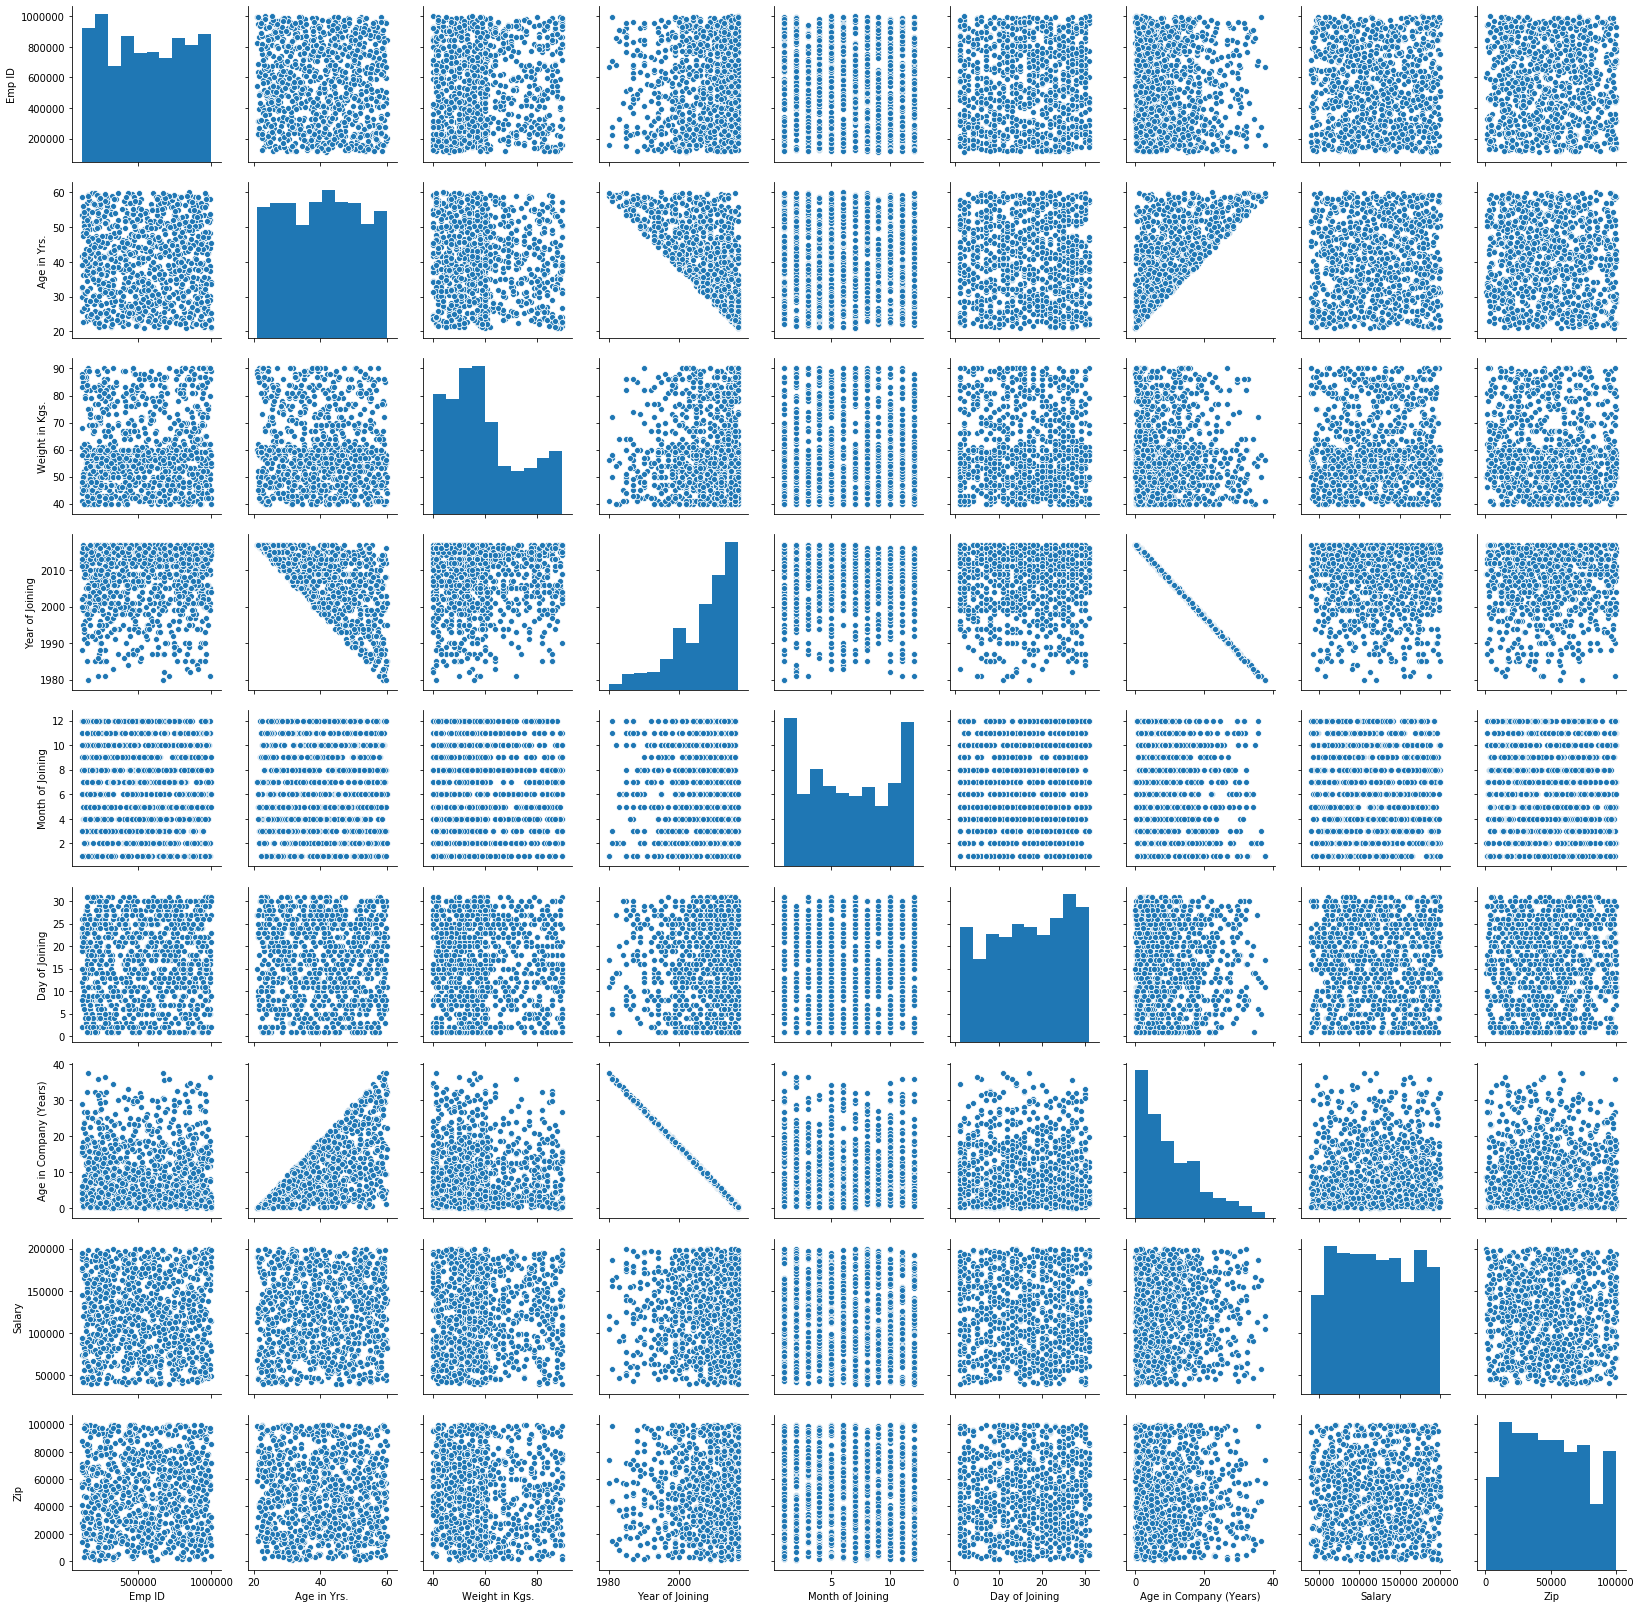

In [22]:
#Plotting grapgh for comparision of columns
sns.pairplot(df)

In [23]:
#We can also use heatmap for analyzing corelation between columns

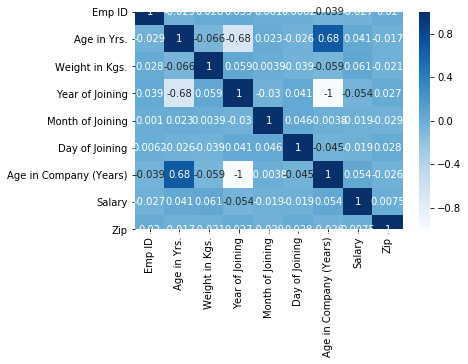

In [24]:
sns.heatmap(df.corr(),cmap = 'Blues', annot=True)

In [25]:
#We can observe strong relation between Age in company and age in years

In [60]:
pd.get_dummies(df, columns=["Gender","Quarter of Joining","Half of Joining"
]).head()

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,Date of Birth,...,User Name,Password,Gender_F,Gender_M,Quarter of Joining_Q1,Quarter of Joining_Q2,Quarter of Joining_Q3,Quarter of Joining_Q4,Half of Joining_H1,Half of Joining_H2
0,850297,Ms.,Shawna,W,Buck,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,12/12/1971,...,swbuck,ja8?k3BTF^]o@<&,1,0,0,0,0,1,0,1
1,304721,Mr.,Nathaniel,Z,Burke,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,10/31/1993,...,nzburke,tPA@4Wh9Ja$+Ln,0,1,0,1,0,0,1,0
2,412317,Drs.,Elisabeth,W,Foster,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,11/26/1994,...,ewfoster,5D.B4IGNkWJfG<~,1,0,1,0,0,0,1,0
3,621375,Mrs.,Briana,C,Lancaster,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,11/24/1975,...,bclancaster,I%?JDM;pW,1,0,1,0,0,0,1,0
4,787549,Hon.,Estella,L,Potter,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,3/13/1995,...,elpotter,j4jkEXfC&Rh,1,0,0,0,0,1,0,1


In [70]:
df['Last % Hike'] = df['Last % Hike'].str.rstrip('%').astype('float') / 100.0

In [26]:
#Splitting of data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Salary','Name Prefix','First Name','Middle Initial','Last Name','Gender','E Mail',"Father's Name","Mother's Name","Mother's Maiden Name",
                                                             "Date of Birth","Time of Birth","Age in Yrs.","Weight in Kgs.","Date of Joining","Quarter of Joining","Half of Joining","Place Name","County","City","State","Zip","Region","User Name","Password",
                                                             "Month Name of Joining","Short Month","Day of Joining","DOW of Joining","Short DOW","Phone No. ","SSN"]
, axis=1), df['Salary'],\
                                                    test_size=0.2, random_state=30)

In [ ]:
#Training the model

In [81]:
lm = LinearRegression()

In [82]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
lm.coef_

array([-2.56599745e-03,  3.32635120e+04,  2.92485507e+03,  3.36476387e+04,
       -9.69939675e+03])

In [ ]:
#Predicting the model

In [85]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

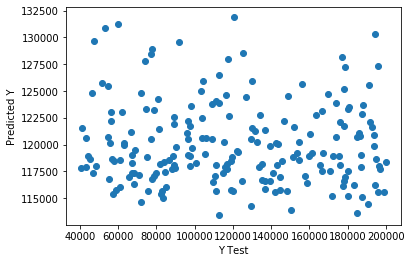

In [86]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#Evaluating the model

In [87]:
from sklearn import metrics

In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 40575.84207520161
Mean Squared Error: 2195633774.1566176
Root Mean Squared Error: 46857.59035798381
